In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
classes = [i for i in os.listdir(data_path) if "." not in i]
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [3]:
label = []
path = []

for dir_name, _,filenames in os.walk(data_path):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dir_name.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dir_name)[-1])         # Append the directory name to label 
                path.append(os.path.join(dir_name,filename))     # Append all the png files to path of that directory

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label
IMAGE_SIZE = (224,224)

In [4]:
data

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [5]:
data.label.value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

Elimizde her sınıftan 1000 veri olacak şekilde 9 sınıftan toplam 9000 adet png formatında veri bulunuyor

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [7]:
def load_and_preprocess_image(img_path, target_size=IMAGE_SIZE):
    img = load_img(img_path, target_size=target_size)  # Load the image
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize
    return img_array

Fonksiyon dataframedeki yol değişkenlerinden resimi getirip normalize ediyor

In [8]:
image_paths = data['path'].values
images = np.array([load_and_preprocess_image(img_path) for img_path in image_paths])

Resimler daha sonraki işlemlerde kullanılabilmek adına numpy arrayı şeklinde tutuluyor

In [9]:
from sklearn.preprocessing import LabelEncoder

# Label encoding: Convert string labels to integers
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # Integer encoded labels

# One-hot encoding the labels
labels = data['label'].values
labels = to_categorical(labels, num_classes=9)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Veri setimiz train,validation ve test setlerine bölünüyor

In [11]:
print(f'Shape of Training Data : ',X_train.shape)
print(f'Shape of Testing Data : ',X_test.shape)
print(f'Shape of Validation Data : ',X_val.shape)
print(f'Shape of Training Data Labels: ',y_train.shape)
print(f'Shape of Testing Data Labels: ',y_test.shape)
print(f'Shape of Validation Data Labels: ',y_val.shape)

Shape of Training Data :  (5400, 224, 224, 3)
Shape of Testing Data :  (1800, 224, 224, 3)
Shape of Validation Data :  (1800, 224, 224, 3)
Shape of Training Data Labels:  (5400, 9)
Shape of Testing Data Labels:  (1800, 9)
Shape of Validation Data Labels:  (1800, 9)


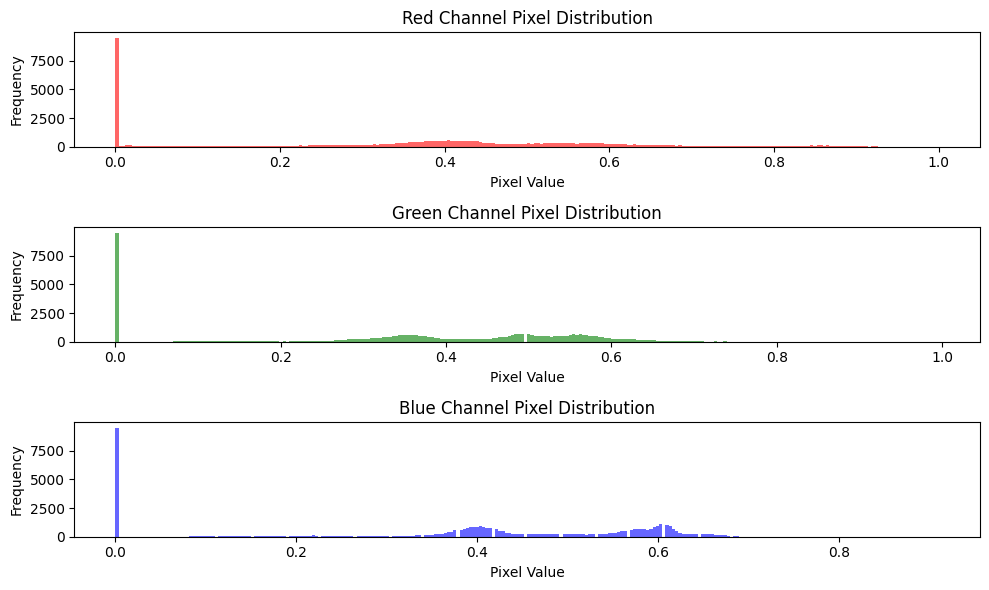

In [12]:
import matplotlib.pyplot as plt

def plot_pixel_distribution(image):
    """
    Verilen bir görüntünün (RGB) piksel değerlerinin dağılımını çizer.
    """
    # Renk kanallarını ayır (Red, Green, Blue)
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    # Histogramı çiz
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.6)
    plt.title('Red Channel Pixel Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 2)
    plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.6)
    plt.title('Green Channel Pixel Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.subplot(3, 1, 3)
    plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.6)
    plt.title('Blue Channel Pixel Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
plot_pixel_distribution(X_train[0])  # X_train'deki ilk görüntü için

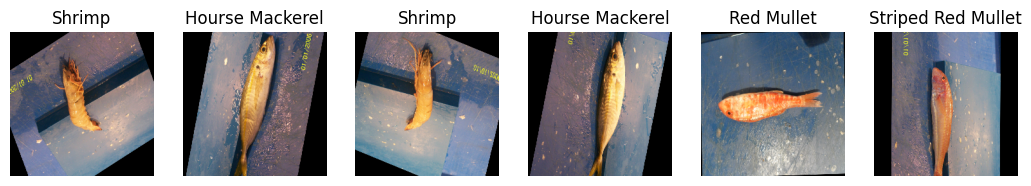

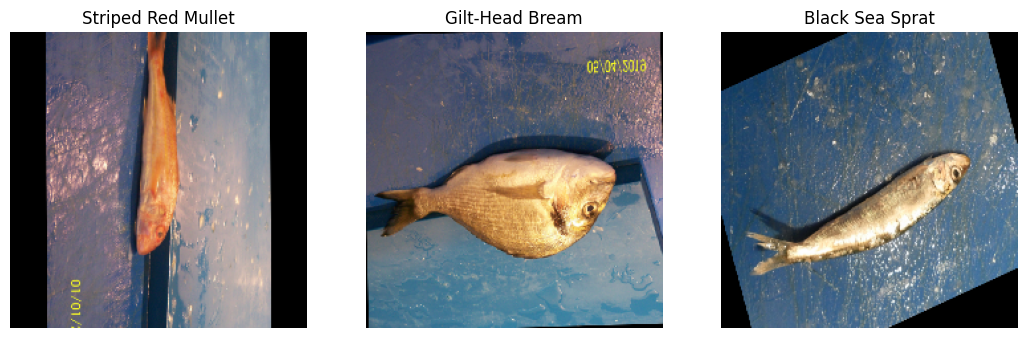

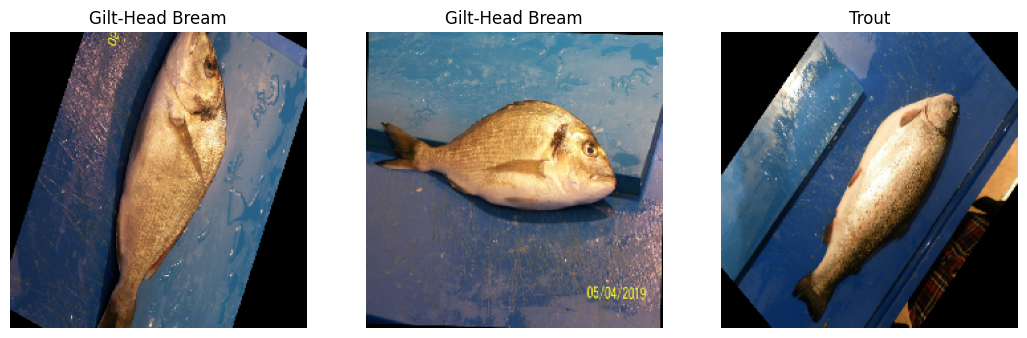

In [13]:
def show_random_images(X, y, label_encoder, num_images=5):
    # Rasgele resimler için indeksleri seç
    random_indices = np.random.choice(X.shape[0], num_images, replace=False)
    
    # Resimleri ve etiketleri göster
    plt.figure(figsize=(13, 4))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i+1)  # 1 satırda num_images kadar sütun
        plt.imshow(X[idx])
        label = label_encoder.inverse_transform([y[idx].argmax()])[0]  # Orijinal etiket ismi
        plt.title(label)
        plt.axis('off')
    
    plt.show()

show_random_images(X_train, y_train, label_encoder, num_images=6)
show_random_images(X_val, y_val, label_encoder, num_images=3)
show_random_images(X_test, y_test, label_encoder, num_images=3)


In [14]:
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Flatten the 224x224 RGB images into a single vector
    Dense(512, activation='relu'), #input layer
    
    Dense(256, activation='relu'), #hidden layer 1
    
    Dense(128, activation='relu'), #hidden layer 2
    
    Dense(9, activation='softmax') #output layer
])

* Modelde toplam 4 adet katman bulunuyor.
* Yaptığım denemeler sonucunda dropout katmanı eklememe kararı aldım. 
* Her ne kadar dropout "overfitting" durumuna bir önlem olsa da eğittiğim farklı modellerde train ve validationun yanı sıra test veri setindeki en yüksek accuracy değerlerini bu modelde aldım.

In [15]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

* Accuracy değerleri ve modelin öğrenmesi artırmak için "Learning Rate" parametremi düşürdüm.
* Bu durum modeli genel anlamda yavaşlatsa da bu proje özelinde zaman açısından büyük bir sorun yaratmadığını düşünüyorum.


In [16]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # İzlenecek metrik (doğrulama kaybı)
    patience=5,          #  val_loss iyileşmezse 5 epoch sonra durdur
    restore_best_weights=True,  # En iyi modelin ağırlıklarını geri yükle
    verbose=1            # Durum güncellemelerini yazdır
)

In [17]:
warnings.filterwarnings("ignore")
results = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


I0000 00:00:1729713183.972225     106 service.cc:145] XLA service 0x7bc770006a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729713183.972311     106 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729713183.972318     106 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  7/169 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1370 - loss: 4.7658

I0000 00:00:1729713186.029779     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.3227 - loss: 2.6116 - val_accuracy: 0.5872 - val_loss: 1.1973
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6493 - loss: 1.0334 - val_accuracy: 0.6761 - val_loss: 0.9068
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7105 - loss: 0.8404 - val_accuracy: 0.7272 - val_loss: 0.7396
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7913 - loss: 0.5934 - val_accuracy: 0.7861 - val_loss: 0.6337
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8499 - loss: 0.4387 - val_accuracy: 0.8428 - val_loss: 0.4785
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9043 - loss: 0.3213 - val_accuracy: 0.7667 - val_loss: 0.6708
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8797 - loss: 0.3469 - val_accuracy: 0.8733 - val_loss: 0.3649
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9315 - loss: 0.2170 - val_accuracy: 0.88

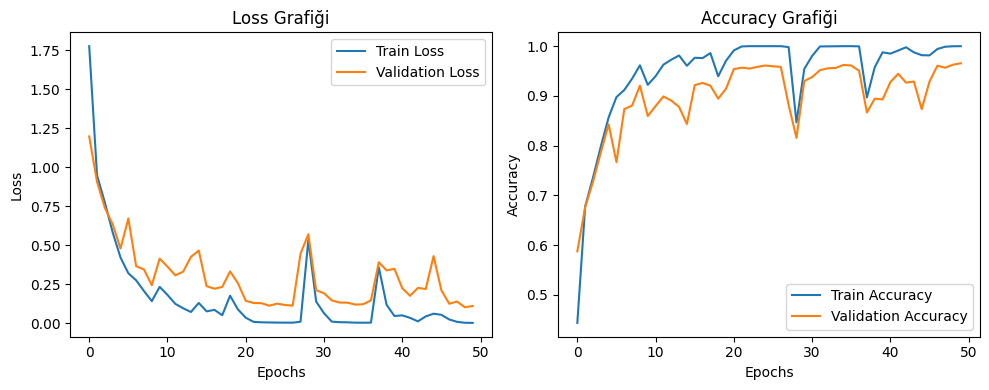

In [18]:
# Eğitim sonuçlarını görselleştirelim
plt.figure(figsize=(10, 4))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


Test seti üzerinde tahmin

In [20]:
#ilk 10 tahmin
pred_classes[:10]

array([1, 0, 2, 8, 8, 4, 7, 4, 3, 8])

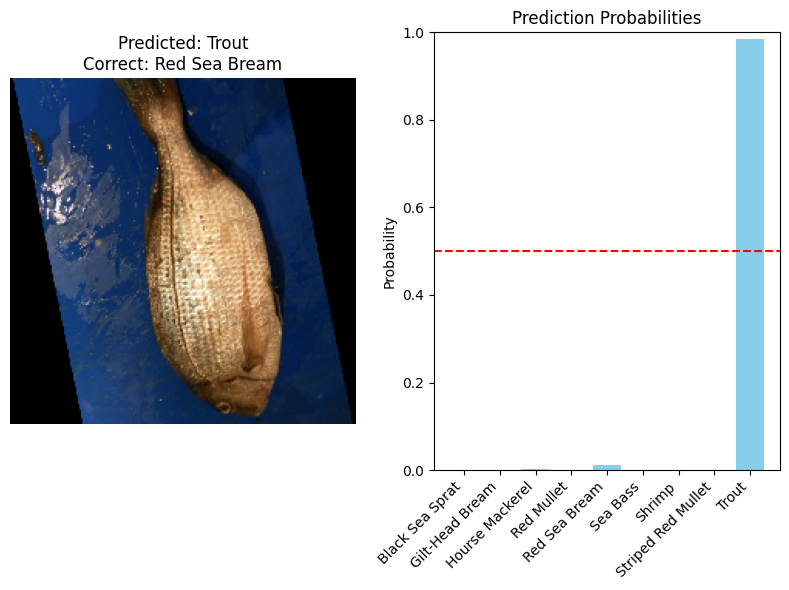

In [21]:
def show_misclassified_image(X, y_true, y_pred, probabilities, label_encoder, index):
    misclassified_indices = np.where(y_true != y_pred)[0]
    
    if index < 0 or index >= len(misclassified_indices):
        print(f"Index {index} is out of range. Please choose a valid index.")
        return

    # Yanlış tahmin edilen görüntüyü seç
    idx = misclassified_indices[index]
    
    # Görüntüyü ve etiketleri göster
    plt.figure(figsize=(8, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(X[idx])
    plt.title(f"Predicted: {label_encoder.inverse_transform([y_pred[idx]])[0]}\nCorrect: {label_encoder.inverse_transform([y_true[idx]])[0]}")
    plt.axis('off')
    
    # Tahmin olasılıklarını göster
    plt.subplot(1, 2, 2)
    class_probabilities = probabilities[idx]
    classes = label_encoder.classes_
    
    plt.bar(classes, class_probabilities, color='skyblue')  # Çubuk grafiği dikey olarak göster
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities')
    plt.ylim(0, 1)  # Olasılık aralığı 0-1
    plt.axhline(y=0.5, color='red', linestyle='--')  # 0.5 çizgisi, tahminin güvenli olup olmadığını gösterir
    
    plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri döndür
    plt.tight_layout()  # Boşlukları ayarla
    plt.show()
    
show_misclassified_image(X_test, y_true, pred_classes,pred,label_encoder, index=0)  # index parametresiyle değiştir    

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.12944284081459045
Test Accuracy: 0.9655555486679077


<Figure size 1200x800 with 0 Axes>

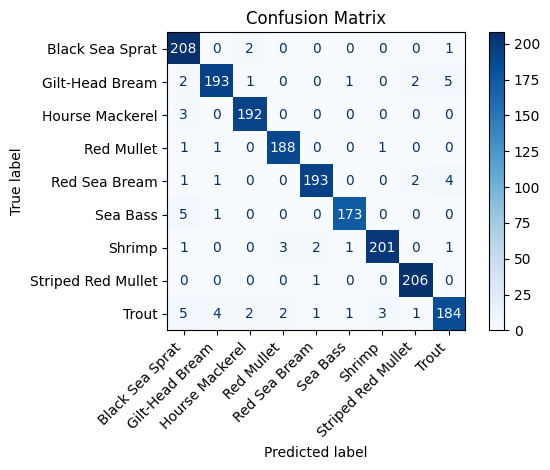

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true,pred_classes)
plt.figure(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()